# Logistic classification with cross-entropy (1/2)
This tutorial will describe the [logistic function](#Logistic-function) used to model binary classification problems. We will provide derivations of the gradients used for optimizing any parameters with regards to the [cross-entropy](#Cross-entropy-loss-function-for-the-logistic-function).

To output discrete classes with neural networks, we can model a probability distribution over the output classes $t$. For the classification of 2 classes $t=1$ or $t=0$ we can use the [logistic function](http://en.wikipedia.org/wiki/Logistic_function) used in [logistic regression](http://en.wikipedia.org/wiki/Logistic_regression). For multiclass classification there exists an extension of this logistic function called the [softmax function](http://en.wikipedia.org/wiki/Softmax_function), which is used in [multinomial logistic regression](http://en.wikipedia.org/wiki/Multinomial_logistic_regression). The [following section]({% post_url /blog/cross_entropy/2015-06-11-cross-entropy-softmax %}) will explain the softmax function and how to derive it. What follows here will explain the logistic function and how to optimize it.

In [7]:
# Python imports
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
from mpl_toolkits.mplot3d import Axes3D  # 3D plots
from matplotlib import cm # Colormaps
import seaborn as sns  # Fancier plots

# Set matplotlib and seaborn plotting style
sns.set_style('darkgrid')

## Logistic function

The goal is to predict the target class $t$ from an input $z$. The probability $P(t=1 | z)$ that input $z$ is classified as class $t=1$ is represented by the output $y$ of the logistic function computed as $y = \sigma(z)$. The [logistic function](http://en.wikipedia.org/wiki/Logistic_function) $\sigma$ is defined as:
$$ \sigma(z) = \frac{1}{1+e^{-z}} $$

This logistic function, implemented below as `logistic(z)`, maps the input $z$ to an output between $0$ and $1$ as is illustrated in the figure below.

We can write the probabilities that the class is $t=1$ or $t=0$ given input $z$ as:

$$\begin{split}
P(t=1| z) & = \sigma(z) = \frac{1}{1+e^{-z}} \\
P(t=0| z) & = 1 - \sigma(z) = \frac{e^{-z}}{1+e^{-z}} 
\end{split}$$

Note that input $z$ to the logistic function corresponds to the log [odds ratio](https://en.wikipedia.org/wiki/Odds_ratio) of $P(t=1|z)$ over $P(t=0|z)$.

$$\begin{split}
\log \frac{P(t=1|z)}{P(t=0|z)} & = \log \frac{\frac{1}{1+e^{-z}}}{\frac{e^{-z}}{1+e^{-z}}} = \log \frac{1}{e^{-z}} \\
& = \log(1) - \log(e^{-z}) = z
\end{split}$$

This means that the log-odds $\log(P(t=1|z)/P(t=0|z))$ changes linearly with $z$. If $z = x \cdot w$, as in a typical neural network linear layer, then as a result, the log-odds will change linearly with the parameters $w$ and input samples $x$.

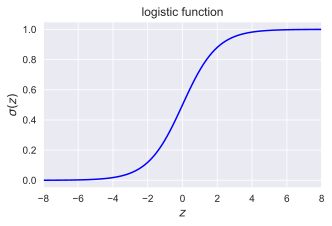

In [4]:
def logistic(z):
    """Logistic function."""
    return 1 / (1 + np.exp(-z))

# Plot the logistic function
z = np.linspace(-8, 8, 100)
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(z, logistic(z), 'b-')
ax.set_xlabel('$z$', fontsize=12)
ax.set_ylabel('$\sigma(z)$', fontsize=12)
ax.set_title('logistic function')
ax.set_xlim(-8, 8)
plt.show()
#

### Derivative of the logistic function

Since neural networks typically use [gradient](http://en.wikipedia.org/wiki/Gradient) based opimization techniques such as [gradient descent](http://en.wikipedia.org/wiki/Gradient_descent) it is important to define the [derivative](http://en.wikipedia.org/wiki/Derivative) of the output $y$ of the logistic function with respect to its input $z$. ${\partial y}/{\partial z}$ can be calculated as:

$$
\frac{\partial y}{\partial z} = \frac{\partial \sigma(z)}{\partial z} 
= \frac{\partial \frac{1}{1+e^{-z}}}{\partial z} 
= \frac{-1}{(1+e^{-z})^2} \cdot e^{-z} \cdot -1 
= \frac{1}{1+e^{-z}} \frac{e^{-z}}{1+e^{-z}}
$$

And since $1 - \sigma(z)) = 1 - {1}/(1+e^{-z}) = {e^{-z}}/(1+e^{-z})$ this can be rewritten as:

$$
\frac{\partial y}{\partial z} 
= \frac{1}{1+e^{-z}} \frac{e^{-z}}{1+e^{-z}} 
= \sigma(z) \cdot (1- \sigma(z)) =  y (1-y)
$$

This derivative is implemented as `logistic_derivative(z)` and is plotted below.

### Cross-entropy loss function for the logistic function

The output of the model $y = \sigma(z)$ can be interpreted as a probability $y$ that input $z$ belongs to one class $(t=1)$, or probability $1-y$ that $z$ belongs to the other class $(t=0)$ in a two class classification problem. We note this down as: $P(t=1| z) = \sigma(z) = y$.

The neural network model will be optimized by maximizing the [likelihood](http://en.wikipedia.org/wiki/Likelihood_function) that a given set of parameters $\theta$ of the model can result in a prediction of the correct class of each input sample. The parameters $\theta$ transform each input sample $i$ into an input to the logistic function $z_{i}$. The likelihood maximization can be written as:

$$
\underset{\theta}{\text{argmax}}\; \mathcal{L}(\theta|t,z) = \underset{\theta}{\text{argmax}} \prod_{i=1}^{n} \mathcal{L}(\theta|t_i,z_i)
$$

The likelihood $\mathcal{L}(\theta|t,z)$ can be rewritten as the [joint probability](http://en.wikipedia.org/wiki/Joint_probability_distribution) of generating $t$ and $z$ given the parameters $\theta$: $P(t,z|\theta)$. Since $P(A,B) = P(A|B)P(B)$ this can be written as:

$$
P(t,z|\theta) = P(t|z,\theta)P(z|\theta)
$$

Since we are not interested in the probability of $z$ we can reduce this to: $\mathcal{L}(\theta|t,z) = P(t|z,\theta) = \prod_{i=1}^{n} P(t_i|z_i,\theta)$. 
Since $t_i$ is a [Bernoulli variable](http://en.wikipedia.org/wiki/Bernoulli_distribution), and the probability $P(t| z) = y$ is fixed for a given $\theta$ we can rewrite this as: 

$$
\begin{split}
P(t|z) & = \prod_{i=1}^{n} P(t_i=1|z_i)^{t_i} \cdot (1 - P(t_i=1|z_i))^{1-t_i} \\
& = \prod_{i=1}^{n} y_i^{t_i} \cdot (1 - y_i)^{1-t_i} \end{split}
$$

Since the logarithmic function is a monotone increasing function we can optimize the log-likelihood function $\underset{\theta}{\text{argmax}}\; \log \mathcal{L}(\theta|t,z)$. This maximum will be the same as the maximum from the regular likelihood function. The benefit of using the log-likelihood is that it can prevent numerical [underflow](https://en.wikipedia.org/wiki/Arithmetic_underflow) when the probabilities are low. The log-likelihood function can be written as:

$$
\begin{split} \log \mathcal{L}(\theta|t,z) & = \log \prod_{i=1}^{n} y_i^{t_i} \cdot (1 - y_i)^{1-t_i} \\
& = \sum_{i=1}^{n} t_i \log(y_i) + (1-t_i) \log(1 - y_i)
\end{split}
$$

Minimizing the negative of this function (minimizing the negative log likelihood) corresponds to maximizing the likelihood. This error function $\xi(t,y)$ is typically known as the [cross-entropy error function](http://en.wikipedia.org/wiki/Cross_entropy) (also known as log-loss):

$$
\begin{split}
\xi(t,y) & = - \log \mathcal{L}(\theta|t,z) \\
& = - \sum_{i=1}^{n} \left[ t_i \log(y_i) + (1-t_i)\log(1-y_i) \right] \\
& = - \sum_{i=1}^{n} \left[ t_i \log(\sigma(z)) + (1-t_i)\log(1-\sigma(z)) \right]
\end{split}
$$

This function looks complicated but besides the previous derivation there are a couple of intuitions why this function is used as a [loss function](https://en.wikipedia.org/wiki/Loss_function) for logistic regression. First of all it can be rewritten as:

$$
\xi(t_i,y_i) = 
\begin{cases}
    -\log(y_i) & \text{if } t_i = 1 \\
    -\log(1-y_i) & \text{if } t_i = 0
\end{cases}
$$
  
Which in the case of $t_i=1$ is $0$ if $y_i=1$ $(-\log(1)=0)$ and goes to infinity as $y_i \rightarrow 0$ $(\underset{y \rightarrow 0}{\text{lim}}{(-\log(y))} = +\infty)$. The reverse effect is happening if $t_i=0$.  
So what we end up with is a loss function that is $0$ if the probability to predict the correct class is $1$ and goes to infinity as the probability to predict the correct class goes to $0$.

Notice that the loss function $\xi(t,y)$ is equal to the negative [log probability](http://en.wikipedia.org/wiki/Log_probability) that $z$ is classified as its correct class:  
$$
\begin{split}
-\log(P(t=1| z)) &= -\log(y) \\  
-\log(P(t=0| z)) &= -\log(1-y)
\end{split}
$$

By minimizing the negative log probability, we will maximize the log probability. And since $t$ can only be $0$ or $1$, we can write $\xi(t,y)$ as:

$$
\xi(t,y) = -t \log(y) - (1-t) \log(1-y)
$$

Which will give $\xi(t,y) = - \sum_{i=1}^{n} \left[ t_i \log(y_i) + (1-t_i)\log(1-y_i) \right]$ if we sum over all $n$ samples.


Another reason to use the cross-entropy function is that in simple logistic regression this results in a [convex](http://en.wikipedia.org/wiki/Convex_function) loss function, of which the global minimum will be easy to find. Note that this is not necessarily the case anymore in multilayer neural networks.

#### Derivative of the cross-entropy loss function for the logistic function

The derivative ${\partial \xi}/{\partial y}$ of the loss function with respect to its input can be calculated as:

$$
\begin{split}
\frac{\partial \xi}{\partial y} 
&= \frac{\partial (-t \log(y) - (1-t) \log(1-y))}{\partial y} 
= \frac{\partial (-t \log(y))}{\partial y} +  \frac{\partial (- (1-t)  \log(1-y))}{\partial y} \\
& = -\frac{t}{y} + \frac{1-t}{1-y} = \frac{y-t}{y(1-y)}
\end{split}
$$

This derivative will give a nice formula if it is used to calculate the derivative of the loss function with respect to the inputs of the classifier ${\partial \xi}/{\partial z}$ since the derivative of the logistic function is ${\partial y}/{\partial z} =  y (1-y)$:

$$
\frac{\partial \xi}{\partial z} = \frac{\partial y}{\partial z} \frac{\partial \xi}{\partial y} = y (1-y) \frac{y-t}{y(1-y)} = y-t
$$

#### Derivative of the cross-entropy loss function for the logistic function

The derivative ${\partial \xi}/{\partial y}$ of the loss function with respect to its input can be calculated as:

$$
\begin{split}
\frac{\partial \xi}{\partial y} 
&= \frac{\partial (-t \log(y) - (1-t) \log(1-y))}{\partial y} 
= \frac{\partial (-t \log(y))}{\partial y} +  \frac{\partial (- (1-t)  \log(1-y))}{\partial y} \\
& = -\frac{t}{y} + \frac{1-t}{1-y} = \frac{y-t}{y(1-y)}
\end{split}
$$

This derivative will give a nice formula if it is used to calculate the derivative of the loss function with respect to the inputs of the classifier ${\partial \xi}/{\partial z}$ since the derivative of the logistic function is ${\partial y}/{\partial z} =  y (1-y)$:

$$
\frac{\partial \xi}{\partial z} = \frac{\partial y}{\partial z} \frac{\partial \xi}{\partial y} = y (1-y) \frac{y-t}{y(1-y)} = y-t
$$

# Softmax classification with cross-entropy (2/2)

## Softmax function

The [logistic output function](http://en.wikipedia.org/wiki/Logistic_function) described in the previous section can only be used for the classification between two target classes $t=1$ and $t=0$. This logistic function can be generalized to output a multiclass categorical probability distribution by the [softmax function](http://en.wikipedia.org/wiki/Softmax_function). This softmax function $\varsigma$ takes as input a $C$-dimensional vector $\mathbf{z}$ and outputs a $C$-dimensional vector $\mathbf{y}$ of real values between $0$ and $1$. This function is a normalized exponential and is defined as:

$$
y_c = \varsigma(\mathbf{z})_c = \frac{e^{z_c}}{\sum_{d=1}^C e^{z_d}} \quad \text{for} \; c = 1 \cdots C
$$

The denominator $\sum_{d=1}^C e^{z_d}$ acts as a regularizer to make sure that $\sum_{c=1}^C y_c = 1$. 
As the output layer of a neural network, the softmax function can be represented graphically as a layer with $C$ neurons.

We can write the probabilities that the class is $t=c$ for $c = 1 \ldots C$ given input $\mathbf{z}$ as:

$$ 
\begin{bmatrix} 
P(t=1 | \mathbf{z}) \\
\vdots \\
P(t=C | \mathbf{z}) \\
\end{bmatrix}
= \begin{bmatrix} 
\varsigma(\mathbf{z})_1 \\
\vdots \\
\varsigma(\mathbf{z})_C \\
\end{bmatrix}
= \frac{1}{\sum_{d=1}^C e^{z_d}}
\begin{bmatrix} 
e^{z_1} \\
\vdots \\
e^{z_C} \\
\end{bmatrix}
$$

Where $P(t=c | \mathbf{z})$ is thus the probability that that the class is $c$ given the input $\mathbf{z}$.

These probabilities of the output $P(t=1|\mathbf{z})$ for an example system with 2 classes ($t=1$, $t=2$) and input $\mathbf{z} = [z_1, z_2]$ are shown in the figure below. The other probability $P(t=2|\mathbf{z})$ will be complementary.

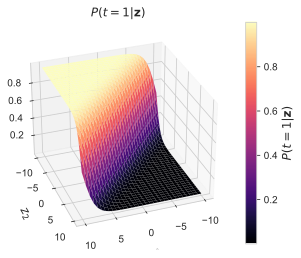

In [9]:
def softmax(z):
    """Softmax function"""
    return np.exp(z) / np.sum(np.exp(z))

# Plot the softmax output for 2 dimensions for both classes
# Plot the output in function of the weights
# Define a vector of weights for which we want to plot the output
nb_of_zs = 33
zs = np.linspace(-10, 10, num=nb_of_zs) # input 
zs_1, zs_2 = np.meshgrid(zs, zs) # generate grid
y = np.zeros((nb_of_zs, nb_of_zs, 2)) # initialize output
# Fill the output matrix for each combination of input z's
for i in range(nb_of_zs):
    for j in range(nb_of_zs):
        y[i,j,:] = softmax(np.asarray([zs_1[i,j], zs_2[i,j]]))
# Plot the loss function surfaces for both classes
with sns.axes_style("whitegrid"):
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    # Plot the loss function surface for t=1
    surf = ax.plot_surface(zs_1, zs_2, y[:,:,0], linewidth=0, cmap=cm.magma)
    ax.view_init(elev=30, azim=70)
    cbar = fig.colorbar(surf)
    ax.set_xlabel('$z_1$', fontsize=2)
    ax.set_ylabel('$z_2$', fontsize=12)
    ax.set_zlabel('$y_1$', fontsize=12)
    ax.set_title ('$P(t=1|\mathbf{z})$')
    cbar.ax.set_ylabel('$P(t=1|\mathbf{z})$', fontsize=12)
plt.show()
#

### Cross-entropy loss function for the softmax function

To derive the loss function for the softmax function we start out from the [likelihood function](http://en.wikipedia.org/wiki/Likelihood_function) that a given set of parameters $\theta$ of the model can result in prediction of the correct class of each input sample, as in the derivation for the logistic loss function. The maximization of this likelihood can be written as:

$$
\underset{\theta}{\text{argmax}}\; \mathcal{L}(\theta|\mathbf{t},\mathbf{z})
$$

The likelihood $\mathcal{L}(\theta|\mathbf{t},\mathbf{z})$ can be rewritten as the [joint probability](http://en.wikipedia.org/wiki/Joint_probability_distribution) of generating $\mathbf{t}$ and $\mathbf{z}$ given the parameters $\theta$: $P(\mathbf{t},\mathbf{z}|\theta)$. Which can be decomposed as a conditional distribution and a marginal:

$$
P(\mathbf{t},\mathbf{z}|\theta) = P(\mathbf{t}|\mathbf{z},\theta)P(\mathbf{z}|\theta)
$$

Since we are not interested in the probability of $\mathbf{z}$ we can reduce this to: $\mathcal{L}(\theta|\mathbf{t},\mathbf{z}) = P(\mathbf{t}|\mathbf{z},\theta)$. Which can be written as $P(\mathbf{t}|\mathbf{z})$ for fixed $\theta$.
Since each $t_c$ is dependent on the full $\mathbf{z}$, and only 1 class can be activated in the $\mathbf{t}$ we can write

$$
P(\mathbf{t}|\mathbf{z}) = \prod_{i=c}^{C} P(t_c|\mathbf{z})^{t_c} = \prod_{c=1}^{C} \varsigma(\mathbf{z})_c^{t_c} = \prod_{c=1}^{C} y_c^{t_c}
$$


As was noted during the derivation of the loss function of the logistic function, maximizing this likelihood can also be done by minimizing the negative log-likelihood:

$$-\log \mathcal{L}(\theta|\mathbf{t},\mathbf{z}) 
= \xi(\mathbf{t},\mathbf{z}) = - \log \prod_{c=1}^{C} y_c^{t_c} 
= - \sum_{c=1}^{C} t_c \cdot \log(y_c)
$$

Which is the cross-entropy error function $\xi$.
Note that for a 2 class system output $t_2 = 1 - t_1$ and this results in the same error function as for logistic regression: $\xi(\mathbf{t},\mathbf{y}) =- t_c \log(y_c) - (1-t_c) \log(1-y_c) $.

The cross-entropy error function over a batch of multiple samples of size $n$ can be calculated as:

$$
\xi(T,Y) = \sum_{i=1}^n \xi(\mathbf{t}_i,\mathbf{y}_i) = -\sum_{i=1}^n \sum_{c=1}^{C} t_{ic} \cdot \log( y_{ic})
$$

Where $t_{ic}$ is 1 if and only if sample $i$ belongs to class $c$, and $y_{ic}$ is the output probability that sample $i$ belongs to class $c$.

#### Derivative of the cross-entropy loss function for the softmax function

The derivative ${\partial \xi}/{\partial z_i}$ of the loss function with respect to the softmax input $z_i$ can be calculated as:

$$
\begin{split}
\frac{\partial \xi}{\partial z_i} & = - \sum_{j=1}^C \frac{\partial t_j \log(y_j)}{\partial z_i}{} 
= - \sum_{j=1}^C t_j \frac{\partial \log(y_j)}{\partial z_i} 
= - \sum_{j=1}^C t_j \frac{1}{y_j} \frac{\partial y_j}{\partial z_i} \\
& = - \frac{t_i}{y_i} \frac{\partial y_i}{\partial z_i} - \sum_{j \neq i}^C \frac{t_j}{y_j} \frac{\partial y_j}{\partial z_i}
= - \frac{t_i}{y_i} y_i (1-y_i) - \sum_{j \neq i}^C \frac{t_j}{y_j} (-y_j y_i) \\
& = - t_i + t_i y_i + \sum_{j \neq i}^C t_j y_i = - t_i + \sum_{j = 1}^C t_j y_i
= -t_i + y_i \sum_{j = 1}^C t_j \\
& = y_i - t_i
\end{split}
$$

Note that we already derived ${\partial y_j}/{\partial z_i}$ for $i=j$ and $i \neq j$ above.

The result that ${\partial \xi}/{\partial z_i} = y_i - t_i$ for all $i \in C$ is the same as the derivative of the cross-entropy for the logistic function which had only one output node.

# Building a Logistic Regression Classifier in PyTorch
Logistic regression is a type of regression that predicts the probability of an event. It is used for classification problems and has many applications in the fields of machine learning, artificial intelligence, and data mining.

The formula of logistic regression is to apply a sigmoid function to the output of a linear function. This article discusses how you can build a logistic regression classifier. While previously you have been working on a single-varable dataset, here we’ll be using a popular MNIST dataset to train and test our model. 

## The MNIST Dataset
You will train and test a logistic regression model with MNIST dataset. This dataset contains 6000 images for training and 10000 images for testing the out-of-sample performance. The MNIST dataset is so popular that it is part of PyTorch. Here is how you can load the training and testing samples of the MNIST dataset in PyTorch.

100%|██████████| 9912422/9912422 [00:00<00:00, 23173291.03it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 6855055.96it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 2754137.00it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2330339.91it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

number of training samples: 60000
number of testing samples: 10000
label of the first taining sample:  5
label of the second taining sample:  0


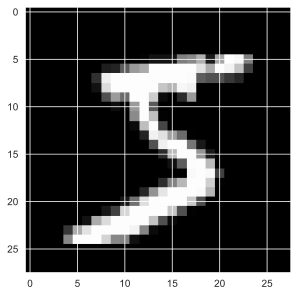

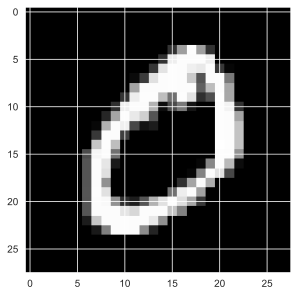

In [15]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets

# loading training data
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)
#loading test data
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transforms.ToTensor())

print("number of training samples: " + str(len(train_dataset)) + "\n" +
      "number of testing samples: " + str(len(test_dataset)))

# check the label of first two training sample
print("label of the first taining sample: ", train_dataset[0][1])
print("label of the second taining sample: ", train_dataset[1][1])

img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap='gray')
plt.show()
img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap='gray')
plt.show()

## Load Dataset into DataLoader
Usually, you do not use the dataset directly in training but through a DataLoader class. This allows you to read data in batches, not samples. In the following, data is loaded into a DataLoader with batch size at 32.

In [16]:
...
from torch.utils.data import DataLoader

# load train and test data samples into dataloader
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True) 
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)

## Build the Model with nn.Module
Let’s build the model class with nn.Module for our logistic regression model. This class is similar to that in the previous posts but the numbers of input and output are configurable.

In [17]:
# build custom module for logistic regression
class LogisticRegression(torch.nn.Module):    
    # build the constructor
    def __init__(self, n_inputs, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
    # make predictions
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

## Training the Classifier
You will train this model with stochastic gradient descent as the optimizer with learning rate 0.001 and cross-entropy as the loss metric. Then, the model is trained for 50 epochs. Note that you have use view() method to flatten the image matrices into rows to fit the same of the logistic regression model input.

In [19]:
# instantiate the model
n_inputs = 28 * 28 # makes a 1D vector of 784
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)

# defining the optimizer
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()

epochs = 50
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 2.20975661277771. Accuracy: 56.79
Epoch: 1. Loss: 2.101473331451416. Accuracy: 72.31
Epoch: 2. Loss: 2.0733704566955566. Accuracy: 76.25
Epoch: 3. Loss: 2.0038232803344727. Accuracy: 78.41
Epoch: 4. Loss: 1.9294617176055908. Accuracy: 79.65
Epoch: 5. Loss: 1.9283970594406128. Accuracy: 80.72
Epoch: 6. Loss: 1.8837132453918457. Accuracy: 81.28
Epoch: 7. Loss: 1.9192249774932861. Accuracy: 81.71
Epoch: 8. Loss: 1.8866422176361084. Accuracy: 82.01
Epoch: 9. Loss: 1.8873291015625. Accuracy: 82.39
Epoch: 10. Loss: 1.8204340934753418. Accuracy: 82.7
Epoch: 11. Loss: 1.8343586921691895. Accuracy: 82.91
Epoch: 12. Loss: 1.837064504623413. Accuracy: 83.15
Epoch: 13. Loss: 1.82612144947052. Accuracy: 83.33
Epoch: 14. Loss: 1.8229047060012817. Accuracy: 83.52
Epoch: 15. Loss: 1.797853708267212. Accuracy: 83.64
Epoch: 16. Loss: 1.7902898788452148. Accuracy: 83.75
Epoch: 17. Loss: 1.789971113204956. Accuracy: 83.9
Epoch: 18. Loss: 1.805008053779602. Accuracy: 84.03
Epoch: 19. Loss: 

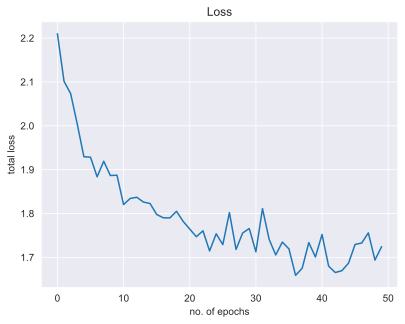

In [20]:
plt.plot(Loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Loss")
plt.show()

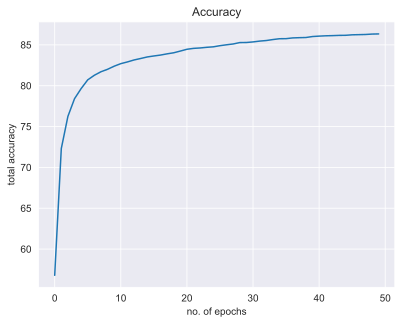

In [21]:
plt.plot(acc)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()